In [1]:
#Importing libraries

#data manipulation libraries
import csv
import numpy as np
import pandas as pd

#data analysis libraries
import textblob
from textblob import TextBlob 

#Topic modelling
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline
import plotly.graph_objects as go
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Removal of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
import re

#Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Geospacial locations
import pandas as pd
import folium
from geopy.geocoders import Nominatim


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Importing the dataset
data = pd.read_csv("taylor_swift_3k.csv")
data.head()

Unnamed: 0            author_id  statuses_count  \
0           0  1462469616756736005             765   
1           1           1238441252            1710   
2           2  1573821906649759744            2327   
3           3  1564461993519505410           23774   
4           4  1573821906649759744            2327   

                         location  verified  followers_count  friends_count  \
0                             NaN     False               24             46   
1         England, United Kingdom     False              465            555   
2  St. Vincent and the Grenadines     False                4              6   
3                     To the Moon     False              398            893   
4  St. Vincent and the Grenadines     False                4              6   

   listed_count  favourites_count             tweet_id  \
0             0              2611  1629994393301024768   
1             3              3278  1629994200400838658   
2             0                 8  1629994142079041541   
3             0             49170  1629994023652933634   
4             0                 8  1629994011359424512   

                                                text           created_at  \
0  @spotify_data @taylorswift13 @karolg @shakira ...  2023-02-26 23:58:41   
1  When I went into HMV earlier it was like they ...  2023-02-26 23:57:55   
2  @KimKardashian @KeriHilson\n@MileyCyrus @Adele...  2023-02-26 23:57:41   
3  @ICYBARBlE @cruel_summer24 @Trashy_Potato06 @c...  2023-02-26 23:57:13   
4  @KimKardashian @KeriHilson\n@MileyCyrus @Adele...  2023-02-26 23:57:10   

  lang  retweet_count                                          hashtags  \
0   en              0                                                []   
1   en              0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2   en              0                                                []   
3   en              0                                                []   
4   en              0                                                []   

   favorite_count  
0              24  
1               6  
2               0  
3               3  
4               0

In [3]:
#Number of rows and columns

print('Numer of Rows {0:} & Number of Features {1:} '.format(data.shape[0], data.shape[1]))

Numer of Rows 2584 & Number of Features 16 


In [4]:
# Cleaning the stopwords and special characters

stop=stopwords.words('english')

def func(text):
    text=text.lower()
    text=re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(w+:\/\/IS+)|^rt|http.+?","",text)
    text=re.sub("taylor","",text)
    text=re.sub("swift","",text)
    text=re.sub("taylor swift", "",text)
    text=re.sub("gif","",text)
    text=re.sub("giphy","",text)
    text=re.sub("gif","",text)
    text=" ".join([word for word in text.split() if word not in (stop)])
    return text

In [5]:
#Applying the stopwords function and printing the new dataset 

data["text"]=data["text"].apply(func)
data

Unnamed: 0            author_id  statuses_count  \
0              0  1462469616756736005             765   
1              1           1238441252            1710   
2              2  1573821906649759744            2327   
3              3  1564461993519505410           23774   
4              4  1573821906649759744            2327   
...          ...                  ...             ...   
2579         579  1499042085051465732             458   
2580         580           1090076035           14066   
2581         581            821611453           18418   
2582         582  1475993707610472448            1348   
2583         583           2439784577             322   

                            location  verified  followers_count  \
0                                NaN     False               24   
1            England, United Kingdom     False              465   
2     St. Vincent and the Grenadines     False                4   
3                        To the Moon     False              398   
4     St. Vincent and the Grenadines     False                4   
...                              ...       ...              ...   
2579                             NaN     False              118   
2580                         she/her     False              973   
2581                 California, USA     False              119   
2582                             NaN     False               92   
2583                  United Kingdom     False               43   

      friends_count  listed_count  favourites_count             tweet_id  \
0                46             0              2611  1629994393301024768   
1               555             3              3278  1629994200400838658   
2                 6             0                 8  1629994142079041541   
3               893             0             49170  1629994023652933634   
4                 6             0                 8  1629994011359424512   
...             ...           ...               ...                  ...   
2579            127             0              2954  1632650604928724992   
2580           1642            13             11050  1632650546514391040   
2581             69             0             12303  1632650496342384644   
2582            210             0             22791  1632649724951134213   
2583            177             0              1776  1632649677664317440   

                                                   text           created_at  \
0     spotifydata 13 karolg shakira sza rihanna mile...  2023-02-26 23:58:41   
1     went hmv earlier like set display name happene...  2023-02-26 23:57:55   
2     kimkardashian kerihilsonmileycyrus adele 13 co...  2023-02-26 23:57:41   
3     icybarble cruelsummer24 trashypotato06 chartda...  2023-02-26 23:57:13   
4     kimkardashian kerihilsonmileycyrus adele 13 co...  2023-02-26 23:57:10   
...                                                 ...                  ...   
2579  adeleisgoddess chartdata 13 versions remixes i...  2023-03-06 07:53:32   
2580  tessmhanson 13 omg nice really hard chose thin...  2023-03-06 07:53:18   
2581  statsbillboard 13 oliviarodrigo dojacat dualip...  2023-03-06 07:53:06   
2582                          tessmhanson 13 london boy  2023-03-06 07:50:02   
2583      tessmhanson 13 top song lover cornelia street  2023-03-06 07:49:50   

     lang  retweet_count                                          hashtags  \
0      en              0                                                []   
1      en              0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2      en              0                                                []   
3      en              0                                                []   
4      en              0                                                []   
...   ...            ...                                               ...   
2579   en              0                                                []   
2580   en         

In [6]:
#Removing Unnamed column

df= data.loc[:, ~data.columns.str.contains('^Unnamed')]
df

author_id  statuses_count                        location  \
0     1462469616756736005             765                             NaN   
1              1238441252            1710         England, United Kingdom   
2     1573821906649759744            2327  St. Vincent and the Grenadines   
3     1564461993519505410           23774                     To the Moon   
4     1573821906649759744            2327  St. Vincent and the Grenadines   
...                   ...             ...                             ...   
2579  1499042085051465732             458                             NaN   
2580           1090076035           14066                         she/her   
2581            821611453           18418                 California, USA   
2582  1475993707610472448            1348                             NaN   
2583           2439784577             322                  United Kingdom   

      verified  followers_count  friends_count  listed_count  \
0        False               24             46             0   
1        False              465            555             3   
2        False                4              6             0   
3        False              398            893             0   
4        False                4              6             0   
...        ...              ...            ...           ...   
2579     False              118            127             0   
2580     False              973           1642            13   
2581     False              119             69             0   
2582     False               92            210             0   
2583     False               43            177             0   

      favourites_count             tweet_id  \
0                 2611  1629994393301024768   
1                 3278  1629994200400838658   
2                    8  1629994142079041541   
3                49170  1629994023652933634   
4                    8  1629994011359424512   
...                ...                  ...   
2579              2954  1632650604928724992   
2580             11050  1632650546514391040   
2581             12303  1632650496342384644   
2582             22791  1632649724951134213   
2583              1776  1632649677664317440   

                                                   text           created_at  \
0     spotifydata 13 karolg shakira sza rihanna mile...  2023-02-26 23:58:41   
1     went hmv earlier like set display name happene...  2023-02-26 23:57:55   
2     kimkardashian kerihilsonmileycyrus adele 13 co...  2023-02-26 23:57:41   
3     icybarble cruelsummer24 trashypotato06 chartda...  2023-02-26 23:57:13   
4     kimkardashian kerihilsonmileycyrus adele 13 co...  2023-02-26 23:57:10   
...                                                 ...                  ...   
2579  adeleisgoddess chartdata 13 versions remixes i...  2023-03-06 07:53:32   
2580  tessmhanson 13 omg nice really hard chose thin...  2023-03-06 07:53:18   
2581  statsbillboard 13 oliviarodrigo dojacat dualip...  2023-03-06 07:53:06   
2582                          tessmhanson 13 london boy  2023-03-06 07:50:02   
2583      tessmhanson 13 top song lover cornelia street  2023-03-06 07:49:50   

     lang  retweet_count                                          hashtags  \
0      en              0                                                []   
1      en              0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2      en              0                                                []   
3      en              0                                                []   
4      en              0                                                []   
...   ...            ...                                               ...   
2579   en              0                                                []   
2580   en              0                                                []   
2581   en              0                                                []   
2582   en       

In [7]:
#Data types of all the features 

df.dtypes

author_id            int64
statuses_count       int64
location            object
verified              bool
followers_count      int64
friends_count        int64
listed_count         int64
favourites_count     int64
tweet_id             int64
text                object
created_at          object
lang                object
retweet_count        int64
hashtags            object
favorite_count       int64
dtype: object

In [8]:
# Total Number of tweets 

print('Total number of tweets is {0:} '.format(data.shape[0]))

Total number of tweets is 2584 


In [9]:
#Total number of retweets

total_retweet = df['retweet_count'].sum()
total_retweet

5271

In [10]:
#Average of Favourite count

avg_fav= df['favorite_count'].mean()
avg_fav

26.485681114551085

In [11]:
#Total number of unique authors 

unique_author = df['author_id'].nunique()
print(unique_author)

1816


In [12]:
#Date range of the tweets

df['created_at'] = pd.to_datetime(df['created_at'])

# find the date range of the data
date_range = df['created_at'].min().strftime('%d-%m-%Y') + ' to ' + df['created_at'].max().strftime('%d-%m-%Y')

print(date_range)

26-02-2023 to 06-03-2023


In [13]:
#Converting words to their root words i.e, Stemming 

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()
def stemming(df):
    text=[stemmer.stem(word) for word in df]
    return df

In [14]:
#Applying the stemming function

df['text']=df['text'].apply(lambda x: stemming(x))

In [15]:
# Sentiment analysis

a = SentimentIntensityAnalyzer()

line = []

for row in data["text"]:
    r=a.polarity_scores(row)
    line.append(r)
    
data2=pd.DataFrame(line)
data2

neg    neu    pos  compound
0     0.000  1.000  0.000    0.0000
1     0.000  0.717  0.283    0.7717
2     0.141  0.616  0.243    0.4215
3     0.209  0.711  0.080   -0.4404
4     0.141  0.616  0.243    0.4215
...     ...    ...    ...       ...
2579  0.151  0.849  0.000   -0.2411
2580  0.136  0.640  0.224    0.2748
2581  0.000  0.878  0.122    0.2023
2582  0.000  1.000  0.000    0.0000
2583  0.000  0.472  0.528    0.6808

[2584 rows x 4 columns]

In [16]:
# Polarity and Subjectivity analysis
line = []

for row in data["text"]:
    blob = TextBlob(row)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    line.append({'polarity': polarity, 'subjectivity': subjectivity})

dataF = pd.DataFrame(line)
dataF

polarity  subjectivity
0     0.000000      0.000000
1     0.166667      0.366667
2     0.500000      0.600000
3     0.000000      0.000000
4     0.500000      0.600000
...        ...           ...
2579  0.000000      0.000000
2580  0.154167      0.770833
2581  0.250000      0.625000
2582  0.000000      0.000000
2583  0.500000      0.500000

[2584 rows x 2 columns]

In [17]:
#Concatenation of all the analysis datasets with the main dataframe

data_c=pd.concat([df.reset_index(drop=True),data2,dataF],axis=1)
data_c

author_id  statuses_count                        location  \
0     1462469616756736005             765                             NaN   
1              1238441252            1710         England, United Kingdom   
2     1573821906649759744            2327  St. Vincent and the Grenadines   
3     1564461993519505410           23774                     To the Moon   
4     1573821906649759744            2327  St. Vincent and the Grenadines   
...                   ...             ...                             ...   
2579  1499042085051465732             458                             NaN   
2580           1090076035           14066                         she/her   
2581            821611453           18418                 California, USA   
2582  1475993707610472448            1348                             NaN   
2583           2439784577             322                  United Kingdom   

      verified  followers_count  friends_count  listed_count  \
0        False               24             46             0   
1        False              465            555             3   
2        False                4              6             0   
3        False              398            893             0   
4        False                4              6             0   
...        ...              ...            ...           ...   
2579     False              118            127             0   
2580     False              973           1642            13   
2581     False              119             69             0   
2582     False               92            210             0   
2583     False               43            177             0   

      favourites_count             tweet_id  \
0                 2611  1629994393301024768   
1                 3278  1629994200400838658   
2                    8  1629994142079041541   
3                49170  1629994023652933634   
4                    8  1629994011359424512   
...                ...                  ...   
2579              2954  1632650604928724992   
2580             11050  1632650546514391040   
2581             12303  1632650496342384644   
2582             22791  1632649724951134213   
2583              1776  1632649677664317440   

                                                   text  ... lang  \
0     spotifydata 13 karolg shakira sza rihanna mile...  ...   en   
1     went hmv earlier like set display name happene...  ...   en   
2     kimkardashian kerihilsonmileycyrus adele 13 co...  ...   en   
3     icybarble cruelsummer24 trashypotato06 chartda...  ...   en   
4     kimkardashian kerihilsonmileycyrus adele 13 co...  ...   en   
...                                                 ...  ...  ...   
2579  adeleisgoddess chartdata 13 versions remixes i...  ...   en   
2580  tessmhanson 13 omg nice really hard chose thin...  ...   en   
2581  statsbillboard 13 oliviarodrigo dojacat dualip...  ...   en   
2582                          tessmhanson 13 london boy  ...   en   
2583      tessmhanson 13 top song lover cornelia street  ...   en   

     retweet_count                                          hashtags  \
0                0                                                []   
1                0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2                0                                                []   
3                0                                                []   
4                0                                                []   
...            ...                                               ...   
2579             0                                                []   
2580             0                                                []   
2581             0                                                []   
2582             0                                                []   
2583             0                                                []   

     favorite_count    neg    neu    pos  compound  polarity  s

In [18]:
#Funtion for sentiment analysis

def func(row):
    if row["compound"]==0:
        return "Neutral"
    elif row["compound"]>0:
        return "Positive"
    else:
        return "Negative"

In [19]:
#Applying sentiment analysis function on the dataset 

data_c['Sentiment']= data_c.apply(func,axis=1)
data_c

author_id  statuses_count                        location  \
0     1462469616756736005             765                             NaN   
1              1238441252            1710         England, United Kingdom   
2     1573821906649759744            2327  St. Vincent and the Grenadines   
3     1564461993519505410           23774                     To the Moon   
4     1573821906649759744            2327  St. Vincent and the Grenadines   
...                   ...             ...                             ...   
2579  1499042085051465732             458                             NaN   
2580           1090076035           14066                         she/her   
2581            821611453           18418                 California, USA   
2582  1475993707610472448            1348                             NaN   
2583           2439784577             322                  United Kingdom   

      verified  followers_count  friends_count  listed_count  \
0        False               24             46             0   
1        False              465            555             3   
2        False                4              6             0   
3        False              398            893             0   
4        False                4              6             0   
...        ...              ...            ...           ...   
2579     False              118            127             0   
2580     False              973           1642            13   
2581     False              119             69             0   
2582     False               92            210             0   
2583     False               43            177             0   

      favourites_count             tweet_id  \
0                 2611  1629994393301024768   
1                 3278  1629994200400838658   
2                    8  1629994142079041541   
3                49170  1629994023652933634   
4                    8  1629994011359424512   
...                ...                  ...   
2579              2954  1632650604928724992   
2580             11050  1632650546514391040   
2581             12303  1632650496342384644   
2582             22791  1632649724951134213   
2583              1776  1632649677664317440   

                                                   text  ... retweet_count  \
0     spotifydata 13 karolg shakira sza rihanna mile...  ...             0   
1     went hmv earlier like set display name happene...  ...             0   
2     kimkardashian kerihilsonmileycyrus adele 13 co...  ...             0   
3     icybarble cruelsummer24 trashypotato06 chartda...  ...             0   
4     kimkardashian kerihilsonmileycyrus adele 13 co...  ...             0   
...                                                 ...  ...           ...   
2579  adeleisgoddess chartdata 13 versions remixes i...  ...             0   
2580  tessmhanson 13 omg nice really hard chose thin...  ...             0   
2581  statsbillboard 13 oliviarodrigo dojacat dualip...  ...             0   
2582                          tessmhanson 13 london boy  ...             0   
2583      tessmhanson 13 top song lover cornelia street  ...             0   

                                              hashtags  favorite_count    neg  \
0                                                   []              24  0.000   
1     [{'text': 'TaylorSwift', 'indices': [233, 245]}]               6  0.000   
2                                                   []               0  0.141   
3                                                   []               3  0.209   
4                                                   []               0  0.141   
...                                                ...             ...    ...   
2579                                                []               0  0.151   
2580                                                []               0  0.136   
2581                                                []               1  0.000   
2582      

In [20]:
#Counts of sentiment 

result=data_c["Sentiment"].value_counts()
result

Positive    1124
Neutral     1041
Negative     419
Name: Sentiment, dtype: int64

<AxesSubplot:>

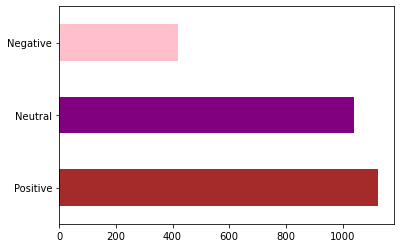

In [21]:
#Graph of the sentiment counts

result.plot(kind='barh', color=["brown", "purple", "pink"])

In [22]:
#Getting all positive tweets with polarity

positive_tweets = data_c[data_c['Sentiment'] == 'Positive'][['author_id', 'text', 'Sentiment', 'polarity']]
positive_tweets = positive_tweets.sort_values(['polarity'], ascending=False)
positive_tweets.head()

author_id                                               text  \
2006  1182683271345389568       bettysporchlght nation13 13 stoppppp perfect   
319             246366880  iheartradio 13 best believe voting vote using ...   
1237            728951766  catch floor living best life gonna see cant wa...   
1548             68801973                             chartdata 13 best song   
2219  1583237809384701953  tessmhanson 13 paper rings id start 23 seconds...   

     Sentiment  polarity  
2006  Positive       1.0  
319   Positive       1.0  
1237  Positive       1.0  
1548  Positive       1.0  
2219  Positive       1.0

In [23]:
#Percentage of positive tweets
Percent_pos=round( (positive_tweets.shape[0] / df.shape[0]) * 100 , 1)
Percent_pos

43.5

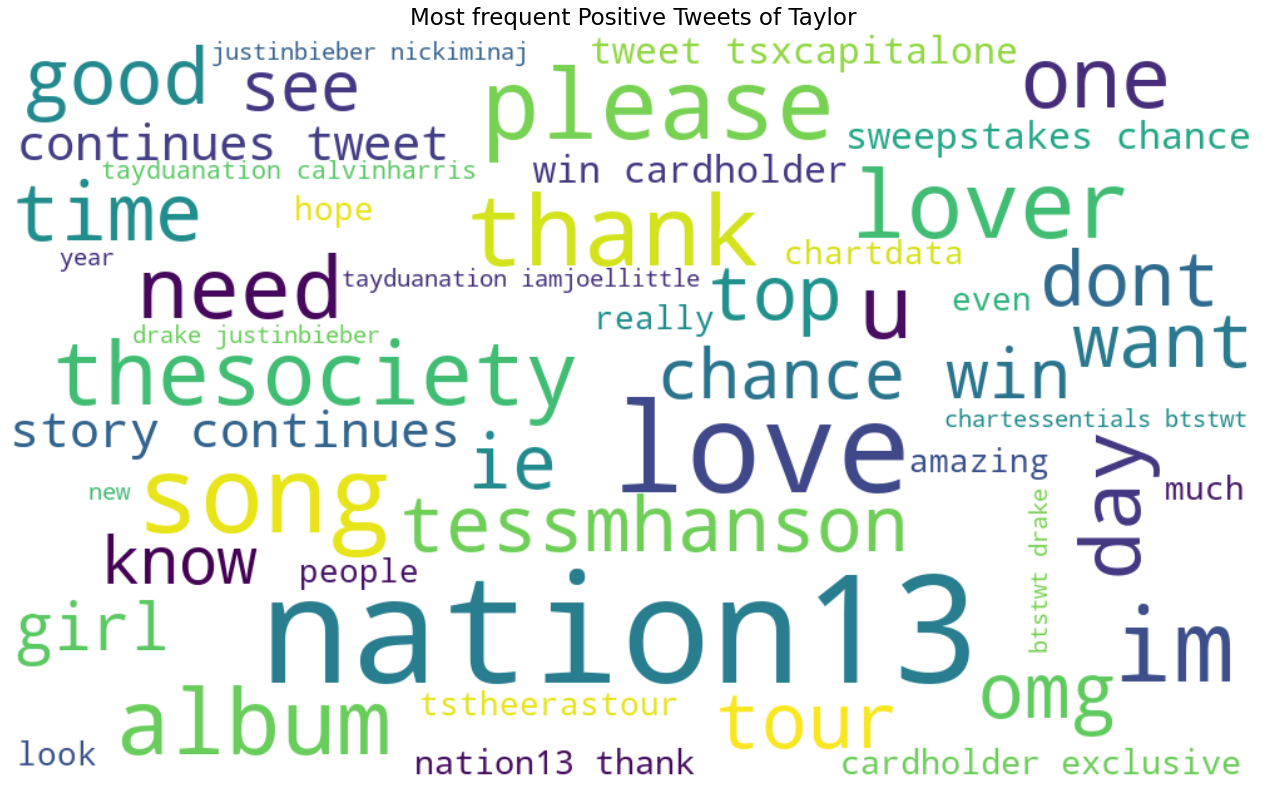

In [24]:
#Word cloud of positive tweets
from wordcloud import WordCloud 

plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in positive_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')

wordCloud = WordCloud(max_words=50, width= 1000, height= 600, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Positive Tweets of Taylor', fontsize=23)
plt.axis('off')
plt.show()

In [25]:
#Getting all negative tweets with polarity

Negative_tweets = data_c[data_c['Sentiment'] == 'Negative'][['author_id', 'text', 'Sentiment', 'polarity']]
Negative_tweets = Negative_tweets.sort_values(['polarity'], ascending=False)
Negative_tweets.head()

author_id                                               text  \
2181  1618650524508721159  dojnikaswoo nickibadoobee chartessentials btst...   
1264  1345519116875128833  bumpyboxx imn0tallt00well thesociety 13 edshee...   
1611  1293241098433974272   thesociety 13 edsheeran uuuuuuuh gonna hurt good   
1827   892048032748912640                   yungboy chartdata 13 havent lmao   
2062  1328358676424486919             blessedy 13 much better stolen version   

     Sentiment  polarity  
2181  Negative      0.80  
1264  Negative      0.75  
1611  Negative      0.70  
1827  Negative      0.60  
2062  Negative      0.50

In [26]:
#Percentage of negative tweets

Percent_neg=round((Negative_tweets.shape[0] / df.shape[0]) * 100 , 1)
Percent_neg

16.2

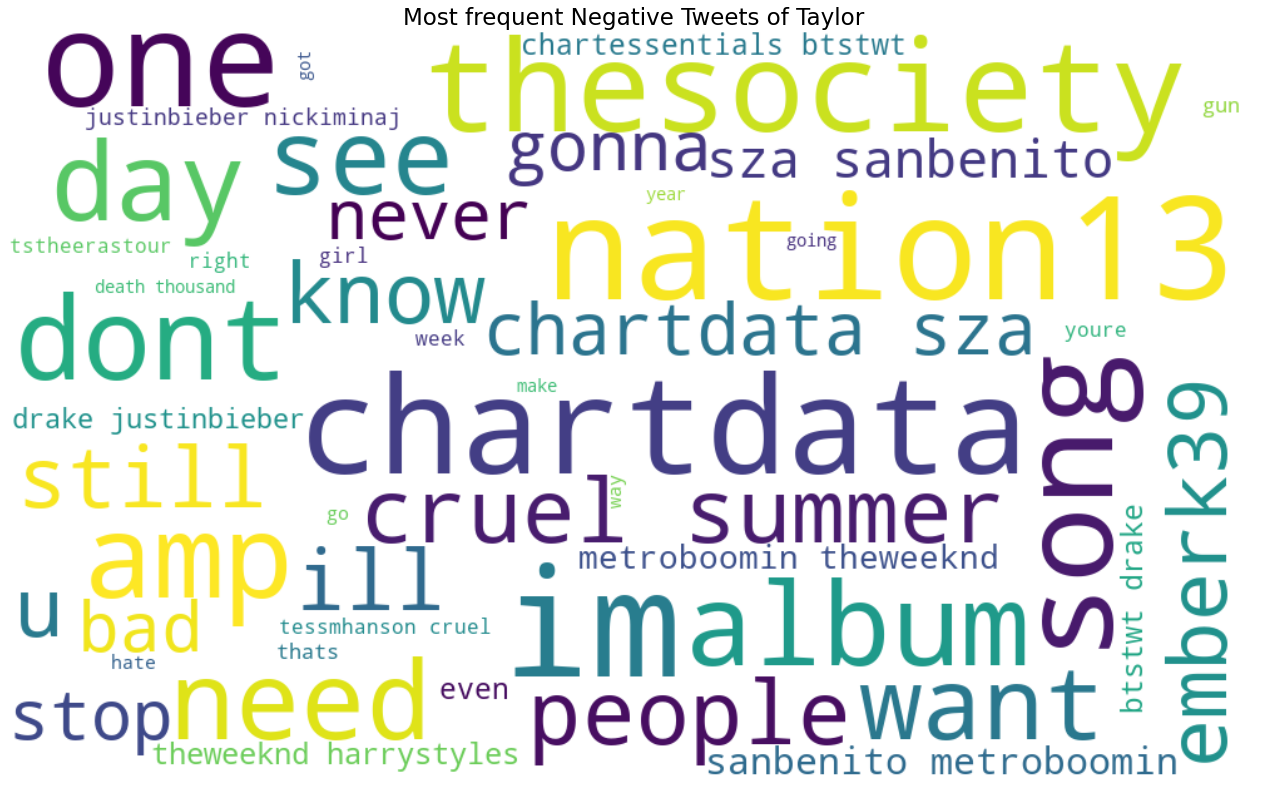

In [27]:
#Word cloud of negative tweets

plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in Negative_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')

wordCloud = WordCloud(max_words=50, width= 1000, height= 600, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Negative Tweets of Taylor', fontsize=23)
plt.axis('off')
plt.show()

In [28]:
#Getting all neutral tweets with polarity

Neutral_tweets = data_c[data_c['Sentiment'] == 'Neutral'][['author_id', 'text', 'Sentiment', 'polarity']]
Neutral_tweets = Neutral_tweets.sort_values(['polarity'], ascending=False)
Neutral_tweets.head()

author_id                                               text  \
48             2811488964  spotifydata 13 karolg shakira sza rihanna mile...   
1102  1356333532742881281  mo0nandsaturn 13 nation13 outfits incredible o...   
1613  1422355702719291418               incredible 13 nation13 tcofvhzijbihn   
1260  1375859661375733760        pommomara 13 nation13 absolutely incredible   
1027           4266410834              serismidnights 13 actually incredible   

     Sentiment  polarity  
48     Neutral       1.0  
1102   Neutral       0.9  
1613   Neutral       0.9  
1260   Neutral       0.9  
1027   Neutral       0.9

In [29]:
#Percentage of Neutral tweets

Percent_neu=round((Neutral_tweets.shape[0] / df.shape[0]) * 100 , 1)
Percent_neu

40.3

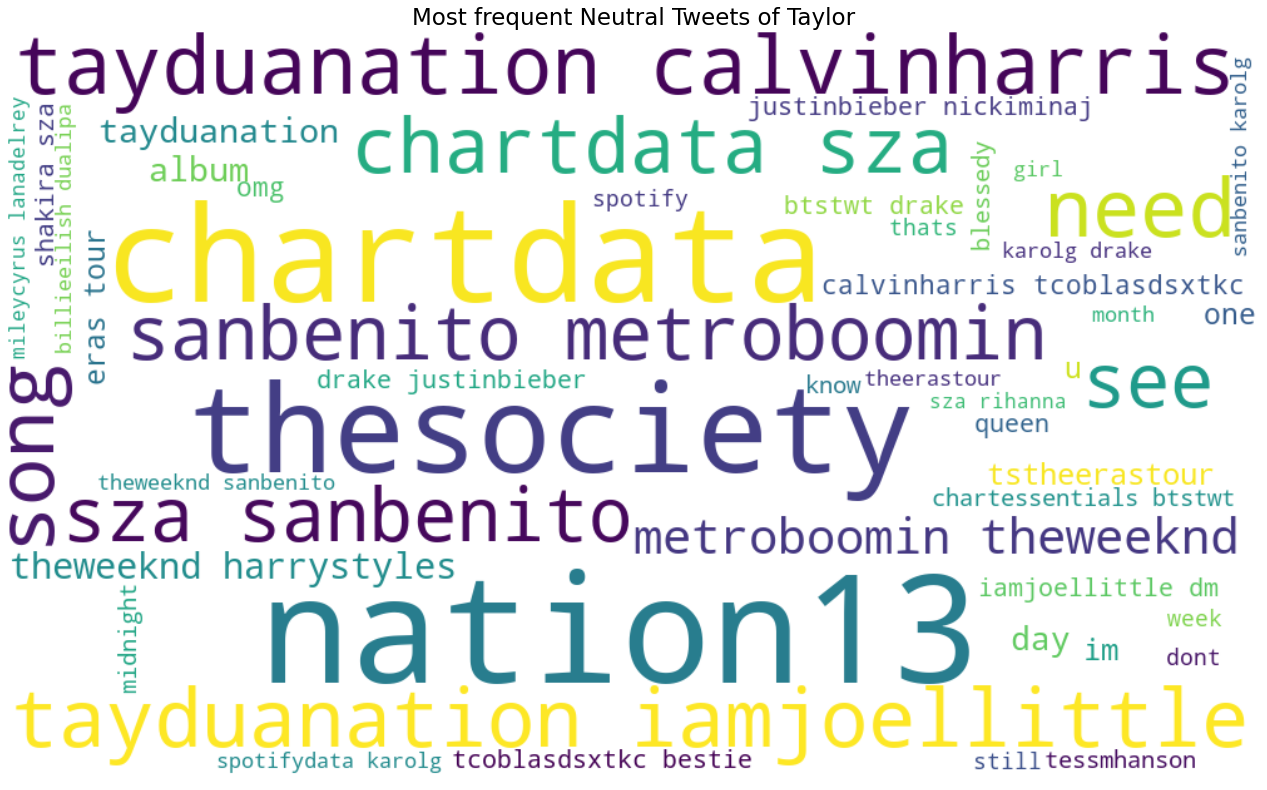

In [30]:
#Word cloud of negative tweets

plt.style.use('fivethirtyeight')

allWords = ' '.join([twts for twts in Neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')

wordCloud = WordCloud(max_words=50, width= 1000, height= 600, random_state= 21, max_font_size= 120, background_color="white").generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Most frequent Neutral Tweets of Taylor', fontsize=23)
plt.axis('off')
plt.show()

In [31]:
#Graph of percentage of sentiments

import plotly.graph_objects as go

# Define the data for the funnel chart
labels = ['Positive', 'Neutral', 'Negative']
values = [Percent_pos, Percent_neu, Percent_neg]

# Create the funnel chart with custom colors
fig = go.Figure(go.Funnel(
    y=labels,
    x=values,
    marker={"color": ["brown", "purple", "pink"]}
))

# Update the layout with the title and background color
fig.update_layout(
    title='Sentiment Funnel Chart',
    width=800,
    height=500,
    margin=dict(l=50, r=50, t=100, b=50),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

# Display the funnel chart
fig.show()


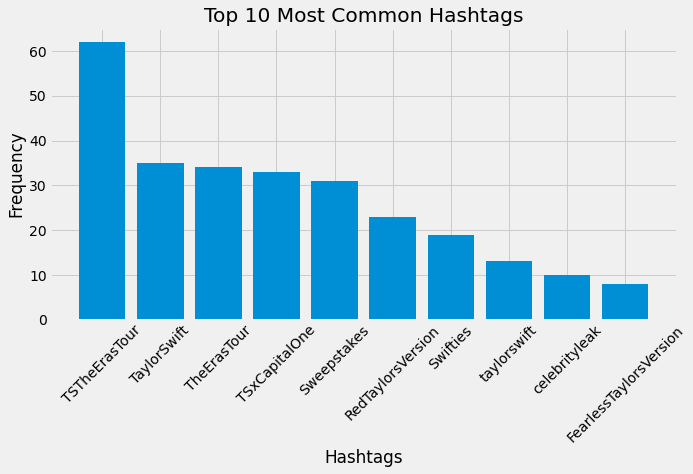

In [32]:
# Create a list to store all the hashtags in the dataset
all_hashtags = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    # Extract the hashtags from the 'hashtags' column
    hashtags = row['hashtags']
    # Convert the string of hashtags into a list of dictionaries
    hashtags_list = eval(hashtags)
    # Loop through each hashtag dictionary in the list
    for hashtag_dict in hashtags_list:
        # Extract the hashtag text and append it to the 'all_hashtags' list
        hashtag_text = hashtag_dict['text']
        all_hashtags.append(hashtag_text)

# Create a Pandas Series from the 'all_hashtags' list
hashtags_series = pd.Series(all_hashtags)

# Get the top 10 most common hashtags in the dataset
top_10_hashtags = hashtags_series.value_counts().head(10)

# Create a bar chart of the top 10 most common hashtags
plt.figure(figsize=(10,5))
plt.bar(top_10_hashtags.index, top_10_hashtags.values)
plt.title("Top 10 Most Common Hashtags")
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [33]:
#Topic modelling
#load your Twitter dataset

tweets = df['text'].tolist()

# preprocess the tweets
def preprocess(text):
    return [token for token in simple_preprocess(text) if token not in gensim.parsing.preprocessing.STOPWORDS]

processed_tweets = [preprocess(tweet) for tweet in tweets]

# create a dictionary and bag-of-words corpus
dictionary = corpora.Dictionary(processed_tweets)
corpus = [dictionary.doc2bow(tweet) for tweet in processed_tweets]

# train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# print the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_topics=10, num_words=10):
    print(f'Topic: {idx}')
    print(f'Words: {topic}\n')

# classify a new tweet
new_tweet = 'new tweet text'
new_tweet_bow = dictionary.doc2bow(preprocess(new_tweet))
new_tweet_topic = lda_model.get_document_topics(new_tweet_bow)

print(f'Topic probabilities: {new_tweet_topic}')

Topic: 0
Words: 0.035*"win" + 0.034*"chance" + 0.019*"dualipa" + 0.018*"mileycyrus" + 0.017*"rihanna" + 0.016*"billieeilish" + 0.016*"spotifydata" + 0.013*"sza" + 0.012*"shakira" + 0.011*"lanadelrey"

Topic: 1
Words: 0.025*"need" + 0.014*"tessmhanson" + 0.013*"tour" + 0.012*"im" + 0.012*"release" + 0.011*"dadorhanes" + 0.011*"thesociety" + 0.011*"nation" + 0.010*"tayduanation" + 0.010*"girls"

Topic: 2
Words: 0.034*"chartdata" + 0.028*"sza" + 0.027*"feeling" + 0.027*"theweeknd" + 0.023*"sanbenito" + 0.016*"harrystyles" + 0.016*"metroboomin" + 0.011*"dont" + 0.009*"tayduanation" + 0.008*"morganwallen"

Topic: 3
Words: 0.044*"capitalone" + 0.036*"tayduanation" + 0.019*"calvinharris" + 0.010*"iamjoellittle" + 0.008*"magicytes" + 0.008*"scottmelker" + 0.008*"officialmrric" + 0.008*"lorneross" + 0.008*"bighomiecoffee" + 0.008*"itskac"

Topic: 4
Words: 0.083*"nation" + 0.047*"justinbieber" + 0.045*"nickiminaj" + 0.014*"life" + 0.013*"omg" + 0.011*"tstheerastour" + 0.011*"bettysporchlght" + 0

In [34]:
#Finding Microinfluencer

# filter the DataFrame to only include rows with followers_count between 10000 and 100000
filtered_df = df[(df['followers_count'] >= 10000) & (df['followers_count'] <= 100000)]

# sort the filtered DataFrame by followers_count in descending order
sorted_df = filtered_df.sort_values('followers_count', ascending=False)

# drop duplicates based on author_id column
unique_authors_df = sorted_df.drop_duplicates(subset='author_id')

# select the top 10 rows with the highest followers_count
top_10_followers = unique_authors_df.head(10)

# print the resulting DataFrame
top_10_followers


author_id  statuses_count                        location  \
2536           2428861627           19269                Worldwide | Asia   
1552             14326874           39400                 Los Angeles, CA   
737    866200095947198464          110961                     SG x3 TS x2   
2176             49958733           48248                  Houston, Texas   
245            1091216816          571769               Las Vegas, Nevada   
1862  1020011472301314048           12829                    Glendale, AZ   
419            3516222976           22340                             NaN   
1422           2262165498           44335                    Florida, USA   
201   1422358469034844162          162240                      Texas, USA   
253            1689378834          121064  U.S. Rocky Mountains/Louisiana   

      verified  followers_count  friends_count  listed_count  \
2536     False            89149            202           211   
1552      True            86407            453           334   
737      False            75669           7926           356   
2176     False            71605           1466          1761   
245      False            71549          74257           310   
1862     False            66813            647            67   
419      False            59547            219           136   
1422     False            48845          18132            66   
201      False            40971          26702             6   
253      False            39369          34551             5   

      favourites_count             tweet_id  \
2536             29244  1632657098914897922   
1552             12852  1631038296171347969   
737             313981  1629913770322456576   
2176             22333  1632710086039683073   
245             436214  1629963071417626624   
1862             64546  1631020253613285379   
419              10191  1629941052235710464   
1422             18386  1631049000659955713   
201              72663  1629969232808083459   
253             125470  1629962089115836417   

                                                   text          created_at  \
2536  13s 1989 amp fearless version reenters us itun... 2023-03-06 08:19:20   
1552            tonyshyoficial 13 thats different album 2023-03-01 21:06:47   
737   spotifyie zaynmalik 13 majorlazer justinbieber... 2023-02-26 18:38:19   
2176  think mistake chart 13 mean day doesnt start w... 2023-03-06 11:49:53   
245   savvyhuman sholzbee scarlettdear1 rightwingert... 2023-02-26 21:54:14   
1862  tstheerastour sunglasses designed 13 tcoxxp7ma... 2023-03-01 19:55:06   
419   rihannas anti joins szas sos amp 13s midnights... 2023-02-26 20:26:44   
1422  devils roll dice angels roll eyes grateful goi... 2023-03-01 21:49:19   
201   savvyhuman sholzbee scarlettdear1 rightwingert... 2023-02-26 22:18:43   
253   roosterpisces sholzbee scarlettdear1 rightwing... 2023-02-26 21:50:19   

     lang  retweet_count                                          hashtags  \
2536   en             24                                                []   
1552   en              0                                                []   
737    en              0                                                []   
2176   en              1                                                []   
245    en              0                                                []   
1862   en             78   [{'text': 'TSTheErasTour', 'indices': [3, 17]}]   
419    en            181                                                []   
1422   en              8  [{'text': 'TheErasTour', 'indices': [243, 255]}]   
201    en              2                                                []   
253    en              0                                                []   

      favorite_count  
2536             232  
1552               2  
737               26  
2176              13  
245                4  
1862            1127  
419             1054  
1422              17  
201      

In [35]:
#Number of counts by an author 

id_counts = df['author_id'].value_counts()
id_counts

1580025292218851328    23
1573394102770696204    23
1094625844230787079    16
1586178813343371265    14
2834606425             14
                       ..
1481579539243405315     1
1608808295900356609     1
973047381099823104      1
463394130               1
2439784577              1
Name: author_id, Length: 1816, dtype: int64

In [36]:
#Choosing a suitable micro influencer

author_id = 2428861627

# Filter the dataset by author ID
person_data = data_c.loc[data_c['author_id'] == author_id]

print(person_data)


       author_id  statuses_count          location  verified  followers_count  \
2128  2428861627           19269  Worldwide | Asia     False            89149   
2318  2428861627           19269  Worldwide | Asia     False            89149   
2536  2428861627           19269  Worldwide | Asia     False            89149   

      friends_count  listed_count  favourites_count             tweet_id  \
2128            202           211             29244  1632714663145119745   
2318            202           211             29244  1632688497948602369   
2536            202           211             29244  1632657098914897922   

                                                   text  ... retweet_count  \
2128  13s love version surpassed 100 million streams...  ...            19   
2318  13 named queen popcountry thechenabtimes cemen...  ...           118   
2536  13s 1989 amp fearless version reenters us itun...  ...            24   

     hashtags  favorite_count  neg    neu    pos  compoun

In [37]:
#Finding null values 

df.isna().sum()

author_id             0
statuses_count        0
location            931
verified              0
followers_count       0
friends_count         0
listed_count          0
favourites_count      0
tweet_id              0
text                  0
created_at            0
lang                  0
retweet_count         0
hashtags              0
favorite_count        0
dtype: int64

In [38]:
#Replacing null values with zero

df.fillna(value=0, inplace=True)
df

author_id  statuses_count                        location  \
0     1462469616756736005             765                               0   
1              1238441252            1710         England, United Kingdom   
2     1573821906649759744            2327  St. Vincent and the Grenadines   
3     1564461993519505410           23774                     To the Moon   
4     1573821906649759744            2327  St. Vincent and the Grenadines   
...                   ...             ...                             ...   
2579  1499042085051465732             458                               0   
2580           1090076035           14066                         she/her   
2581            821611453           18418                 California, USA   
2582  1475993707610472448            1348                               0   
2583           2439784577             322                  United Kingdom   

      verified  followers_count  friends_count  listed_count  \
0        False               24             46             0   
1        False              465            555             3   
2        False                4              6             0   
3        False              398            893             0   
4        False                4              6             0   
...        ...              ...            ...           ...   
2579     False              118            127             0   
2580     False              973           1642            13   
2581     False              119             69             0   
2582     False               92            210             0   
2583     False               43            177             0   

      favourites_count             tweet_id  \
0                 2611  1629994393301024768   
1                 3278  1629994200400838658   
2                    8  1629994142079041541   
3                49170  1629994023652933634   
4                    8  1629994011359424512   
...                ...                  ...   
2579              2954  1632650604928724992   
2580             11050  1632650546514391040   
2581             12303  1632650496342384644   
2582             22791  1632649724951134213   
2583              1776  1632649677664317440   

                                                   text          created_at  \
0     spotifydata 13 karolg shakira sza rihanna mile... 2023-02-26 23:58:41   
1     went hmv earlier like set display name happene... 2023-02-26 23:57:55   
2     kimkardashian kerihilsonmileycyrus adele 13 co... 2023-02-26 23:57:41   
3     icybarble cruelsummer24 trashypotato06 chartda... 2023-02-26 23:57:13   
4     kimkardashian kerihilsonmileycyrus adele 13 co... 2023-02-26 23:57:10   
...                                                 ...                 ...   
2579  adeleisgoddess chartdata 13 versions remixes i... 2023-03-06 07:53:32   
2580  tessmhanson 13 omg nice really hard chose thin... 2023-03-06 07:53:18   
2581  statsbillboard 13 oliviarodrigo dojacat dualip... 2023-03-06 07:53:06   
2582                          tessmhanson 13 london boy 2023-03-06 07:50:02   
2583      tessmhanson 13 top song lover cornelia street 2023-03-06 07:49:50   

     lang  retweet_count                                          hashtags  \
0      en              0                                                []   
1      en              0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2      en              0                                                []   
3      en              0                                                []   
4      en              0                                                []   
...   ...            ...                                               ...   
2579   en              0                                                []   
2580   en              0                                                []   
2581   en              0                                                []   
2582   en              0    

In [39]:
#Removing all the 0 values to make the location map

df3 = df[df['location'] != 0]
df3

author_id  statuses_count                        location  \
1              1238441252            1710         England, United Kingdom   
2     1573821906649759744            2327  St. Vincent and the Grenadines   
3     1564461993519505410           23774                     To the Moon   
4     1573821906649759744            2327  St. Vincent and the Grenadines   
5     1186842384853848064           22392                    she/her | 🇲🇽   
...                   ...             ...                             ...   
2571  1597324105312882690             720                   Raymond Tampa   
2575  1222225684426346497            6991                         Romania   
2580           1090076035           14066                         she/her   
2581            821611453           18418                 California, USA   
2583           2439784577             322                  United Kingdom   

      verified  followers_count  friends_count  listed_count  \
1        False              465            555             3   
2        False                4              6             0   
3        False              398            893             0   
4        False                4              6             0   
5        False              776            441             5   
...        ...              ...            ...           ...   
2571     False               11             58             0   
2575     False              293            475             0   
2580     False              973           1642            13   
2581     False              119             69             0   
2583     False               43            177             0   

      favourites_count             tweet_id  \
1                 3278  1629994200400838658   
2                    8  1629994142079041541   
3                49170  1629994023652933634   
4                    8  1629994011359424512   
5                51344  1629993998168276997   
...                ...                  ...   
2571               960  1632651607040053248   
2575             17324  1632650974073430016   
2580             11050  1632650546514391040   
2581             12303  1632650496342384644   
2583              1776  1632649677664317440   

                                                   text          created_at  \
1     went hmv earlier like set display name happene... 2023-02-26 23:57:55   
2     kimkardashian kerihilsonmileycyrus adele 13 co... 2023-02-26 23:57:41   
3     icybarble cruelsummer24 trashypotato06 chartda... 2023-02-26 23:57:13   
4     kimkardashian kerihilsonmileycyrus adele 13 co... 2023-02-26 23:57:10   
5       thesociety lewiscapaldi 13 voice really amazing 2023-02-26 23:57:07   
...                                                 ...                 ...   
2571  zeharaze aerietrini 13 nation13 need orders right 2023-03-06 07:57:30   
2575  folklore131989 mandybee96 929default thesociet... 2023-03-06 07:55:00   
2580  tessmhanson 13 omg nice really hard chose thin... 2023-03-06 07:53:18   
2581  statsbillboard 13 oliviarodrigo dojacat dualip... 2023-03-06 07:53:06   
2583      tessmhanson 13 top song lover cornelia street 2023-03-06 07:49:50   

     lang  retweet_count                                          hashtags  \
1      en              0  [{'text': 'TaylorSwift', 'indices': [233, 245]}]   
2      en              0                                                []   
3      en              0                                                []   
4      en              0                                                []   
5      en              0                                                []   
...   ...            ...                                               ...   
2571   en              0                                                []   
2575   en              0                                                []   
2580   en              0                                                []   
2581   en              0    

In [41]:
# Geolocation analysis

taylor_df = df3

taylor_map = folium.Map(location=[37.0902, -95.7129])
locations = taylor_df['location'].unique()
geolocator = Nominatim(user_agent="my-custom-agent")
latitudes = []
longitudes = []

for location in locations:
    try:
        loc = geolocator.geocode(location)
        latitudes.append(loc.latitude)
        longitudes.append(loc.longitude)

        folium.Marker([loc.latitude, loc.longitude]).add_to(taylor_map)
    except:
        pass
    
taylor_map.save("taylor_map.html")

taylor_map